# Advanced Machine Learning. Домашнее задание 1

### Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


**Решение:**

Дано:
* A - редкая группа крови у подсудимого
* B - подсудимый есть убийца
* $P(A|B) = 1$
* $P(A|\overline{B})=0.01$ - сказал прокурор (Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%)
* $P(\overline{A}|\overline{B}) = 0.99$ - оценил прокурор (значит, с вероятностью 99% он виновен, предлагаю осудить)

На самом деле он должен был оценить вероятность того, что подсудимый убийца при условии, что у него редкая группа крови:
$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}=
\frac{P(B)}{P(B) + P(A|\overline{B})P(\overline{B})} =
\frac{P(B)}{P(B) + 0.01(1 - P(B))} = 
\frac{P(B)}{0.01 + 0.99P(B)}
$$
P(B) - априорная вероятность факта, что подсудимый есть убийца.

### Задание 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

**Решение:**

В случае, если рассматривается группа крови как единственная улика, то априорная вероятность того, что подсудимый есть убийца, равна P(B)=0.01 и P(B|A) = 0.01. Однако если учитывать факты, что не все из оставшихся 9999 имели возможность совершения преступления (к примеру, были далеко от места преступления), а также если учитывать возможные другие улики против подозреваемого, то P(B) возрастает и, как следствие, возрастает P(B|A).

### Задание 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

* A - положительный тест
* B - болен
* $P(B) = 0.01$
* $P(A|\overline{B})$ - false positive
* $P(\overline{A}|B)$ - false negative
* $P(A|B) = 1 - P(\overline{A}|B)$
* $P(\overline{A}|\overline{B}) = 1 - P(A|\overline{B})$

$$P(B|A) = \frac{P(A|B)P(B)}{P(A|B)P(B)+P(A|\overline{B})P(\overline{B})}$$

$$P(B|\overline{A}) = \frac{P(\overline{A}|B)P(B)}{P(\overline{A}|B)P(B)+P(\overline{A}|\overline{B})P(\overline{B})}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_posterior_prob(fp, fn, test=True):
    tp = 1 - fn
    tn = 1 - fp
    if test:
        return (1 - fn) * 0.01 / ((1 - fn) * 0.01 + fp * 0.99)
    return fn * 0.01 / (fn * 0.01 + (1 - fp) * 0.99)

In [3]:
errors = np.linspace(0.0001, 0.05, 20)

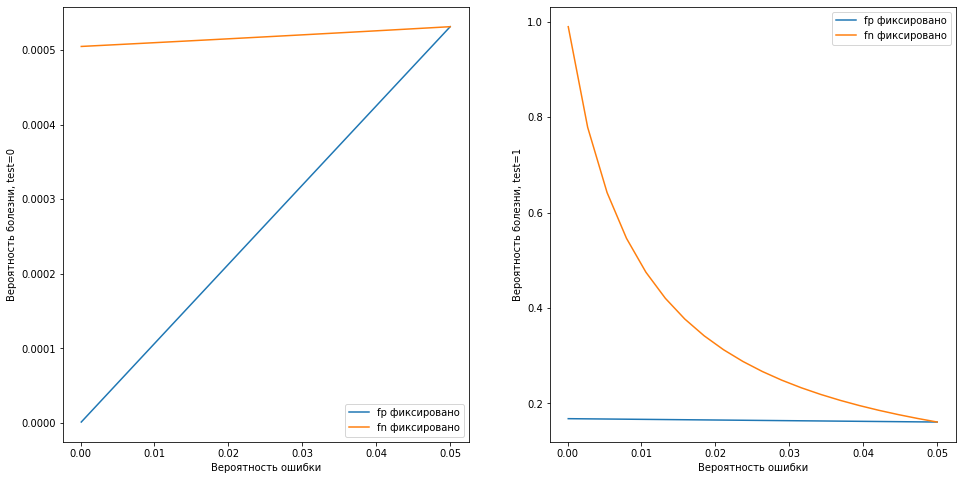

In [4]:
error_types = ['fn', 'fp']
subplot_id = 1
plt.figure(figsize=(16, 8))
for test in [0, 1]:
    plt.subplot(1, 2, subplot_id)
    subplot_id += 1
    plt.xlabel('Вероятность ошибки')
    plt.ylabel(f'Вероятность болезни, test={test}')
    for i, _ in enumerate(error_types):
        if error_types[i] == 'fn':
            probs = get_posterior_prob(0.05, errors, test)
        else:
            probs = get_posterior_prob(errors, 0.05, test)
        label = f'{error_types[i ^ 1]} фиксировано'
        plt.plot(errors, probs, label=label)
        plt.legend()
        
plt.show()

Если не хотим лечить здоровых (заболевание распространяется медленно и/или при каких-то условиях, а лечение дорогостоящее), то уменьшаем false positive. Если для нас важнее выявить заболевание, чем ошибиться на здоровом человеке (ранее диагностирование может предотвратить распространение), то оптимизируем false negative.

В текущей ситуации с коронавирусом, как мне кажется, лучше оптимизировать false negative.